In [1]:
from pap2 import *
import scipy.constants as c

# Versuch 241: RCL-Glied
## 1. Bestimmung der Zeitkonstante

In [9]:
C, R, T12, dT12 = loadtxt("241\\1.csv", skiprows=1, delimiter=',',unpack=True)
C = un.uarray(C, 0.1*C)*c.nano
R = un.uarray(R, 0.05*R)*c.kilo
f = array([120,120,320])
T12 = un.uarray(T12, dT12)*c.milli

t_theo = R*C
t_exp = T12/log(2)

a1 = Table("Tabelle 1: Bestimmung der Zeitkonstante eines RC-Glieds")
a1.field_names = ["$C \ [nF]$", "$R \ [k \Omega]$", "$f \ [Hz]$", "$\\tau_{exp} \ [ms]$", "$\\tau_{theo} \ [ms]$"]
for i in range(3):
    a1.add_row(pformat([C[i]/c.nano, R[i]/c.kilo, f[i], t_exp[i]/c.milli, t_theo[i]/c.milli]))
    
display_table(a1)

$C \ [nF]$,$R \ [k \Omega]$,$f \ [Hz]$,$\tau_{exp} \ [ms]$,$\tau_{theo} \ [ms]$
$\left(4.7 \pm 0.5\right) \times 10^{2}$,$1.00 \pm 0.05$,120,$0.462 \pm 0.029$,$0.47 \pm 0.05$
$4.7 \pm 0.5$,$10.0 \pm 0.5$,120,$0.058 \pm 0.007$,$0.047 \pm 0.005$
$47 \pm 5$,$1.00 \pm 0.05$,320,$0.0491 \pm 0.0029$,$0.047 \pm 0.005$


## 3. Phasengang eines RC-Glieds

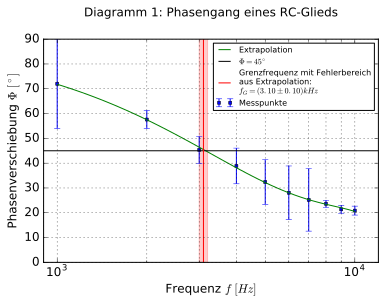

In [10]:
from scipy.interpolate import UnivariateSpline

f, t, dt, _ = loadtxt("241\\3.csv", skiprows=1, delimiter=',', unpack=True)
f = f*1e3
t = un.uarray(t, dt) * 1e-3
p = 360 * f * t

figure()
title(r'Diagramm 1: Phasengang eines RC-Glieds', y=1.08, fontsize=12)
xlabel(r'Frequenz $f \ [Hz]$')
ylabel(r'Phasenverschiebung $\Phi \ [^\circ]$')
errorbar(f, un.nominal_values(p), yerr=un.std_devs(p), fmt='bs', label=r"Messpunkte")

x_ = logspace(0.001,1)*1e3
y_ = linspace(0,90,1000)
extrapolator = UnivariateSpline(un.nominal_values(f), un.nominal_values(p), k=3)
plot(x_, extrapolator(x_), 'g-', label="Extrapolation")

axhline(45, color='k', label=r"$\Phi = 45^{{\circ}}$")

fG = uc.ufloat(3.1, 0.1)*1e3 
axvline(fG.n, color='r', label="Grenzfrequenz mit Fehlerbereich\naus Extrapolation:\n$f_G=({:L})kHz$".format(fG*1e-3))
fill_betweenx(y_, fG.n-fG.s, fG.n+fG.s, color='r', alpha=0.2)

xlim((0.9e3, 1.2e4))
xscale('log')
grid(which='both')
legend(loc=1, fontsize=8)
show()

## 4. Frequenzgang eines Serienschwingkreises

In [15]:
R, fR, f1, f2, U_A, U_E = loadtxt("241\\4.csv", skiprows=1, delimiter=',', unpack=True)
R = un.uarray(R, 0.05*R)
C = 47*c.nano
fR = un.uarray(fR, 0.05)*c.kilo
f1 = un.uarray(f1, 0.03)*c.kilo
f2 = un.uarray(f2, 0.03)*c.kilo
df = abs(f1-f2)
U_A = un.uarray(U_A, 0.01)

L1 = 1/((2*pi*fR)**2 * C)

RRv = 2*pi*df*L1
Rv_band = RRv-R
Rv_res = R * (U_E/U_A - 1)

tab_L1 = Table("Tabelle 2: Induktivität $L_1$ aus Resonanzfrequenzen")
tab_L1.field_names = ["$R \ [\Omega]$", "$f_R \ [kHz]$", "$\Delta f \ [kHz]$", "$U_A \ [V]$", "$U_E \ [V]$", 
                      "$L_1 \ [mH]$","$R+R_V \ [\Omega]$\naus 3dB-Breite","$R_V \ [\Omega]$\naus 3dB-Breite",
                      "$R_V \ [\Omega]$\naus den Amplituden"]
for i in range(3):
    tab_L1.add_row(pformat([R[i], fR[i]/c.kilo, df[i]/c.kilo, U_A[i], U_E[i], L1[i]/c.milli, RRv[i], Rv_band[i], Rv_res[i]]))
display_table(tab_L1)

display(Latex("$L_1=({:L})mH$".format(mean(L1)/c.milli)))

$R \ [\Omega]$,$f_R \ [kHz]$,$\Delta f \ [kHz]$,$U_A \ [V]$,$U_E \ [V]$,$L_1 \ [mH]$,$R+R_V \ [\Omega]$aus 3dB-Breite,$R_V \ [\Omega]$aus 3dB-Breite,$R_V \ [\Omega]$aus den Amplituden
$\left(1.00 \pm 0.05\right) \times 10^{3}$,$3.78 \pm 0.05$,$4.74 \pm 0.04$,$0.960 \pm 0.010$,1.01,$37.7 \pm 1.0$,$1123 \pm 31$,$\left(1.2 \pm 0.6\right) \times 10^{2}$,$52 \pm 11$
$220 \pm 11$,$3.63 \pm 0.05$,$1.28 \pm 0.04$,$0.740 \pm 0.010$,1.01,$40.9 \pm 1.1$,$329 \pm 14$,$109 \pm 18$,$80 \pm 6$
$47.0 \pm 2.4$,$3.63 \pm 0.05$,$0.63 \pm 0.04$,$0.310 \pm 0.010$,1.01,$40.9 \pm 1.1$,$162 \pm 12$,$115 \pm 12$,$106 \pm 7$


<IPython.core.display.Latex object>

## 5. Dämpfungs eines freien Schwingkreises

In [6]:
A, dA = loadtxt("241\\5.csv", skiprows=1, delimiter=',', unpack=True)
A = un.uarray(A, dA)
D = un.log(A[:-1]/A[1:])
T = mean([uc.ufloat(1.56, 0.02), uc.ufloat(1.57, 0.02)])/6 *c.milli
C = 47*c.nano
R = 47*uc.ufloat(1,0.05)

d = D/T
L1_dec = 1/((2*pi/T)**2 * C)
RRv_dec = 2*d*L1_dec
Rv_dec = RRv_dec - R

table_dec = Table("Tabelle 3: Logarithmisches Dekrement")
table_dec.add_column("$\Lambda$", pformat(D))
table_dec.add_column("$\delta \ [s^{{-1}}]$", pformat(d))
table_dec.add_column("$R+R_V \ [\Omega]$", pformat(RRv_dec))
table_dec.add_column("$R_V \ [\Omega]$", pformat(Rv_dec))
display_table(table_dec)

display(Latex("$L_1=({:L})mH$".format(mean(L1_dec)/c.milli)))

$\Lambda$,$\delta \ [s^{{-1}}]$,$R+R_V \ [\Omega]$,$R_V \ [\Omega]$
$0.536 \pm 0.035$,$\left(2.06 \pm 0.14\right) \times 10^{3}$,$151 \pm 10$,$104 \pm 10$
$0.48 \pm 0.04$,$\left(1.86 \pm 0.16\right) \times 10^{3}$,$136 \pm 12$,$89 \pm 12$
$0.43 \pm 0.04$,$\left(1.66 \pm 0.17\right) \times 10^{3}$,$122 \pm 12$,$75 \pm 12$
$0.39 \pm 0.05$,$\left(1.48 \pm 0.20\right) \times 10^{3}$,$109 \pm 15$,$62 \pm 15$


<IPython.core.display.Latex object>